In [1]:
#import export_network
#import cartopy
import pypsa
import plotly.offline as pltly
import matplotlib.pyplot as plt, mpld3
import scipy.sparse as sparse
import pandas as pd
import numpy as np
import logging
import warnings
logging.basicConfig(level=logging.ERROR)

In [2]:
network = pypsa.Network(name='Texas')
network.import_from_netcdf('texas_grid.netcdf')
removed_lines = pd.DataFrame()
reduced_generators = pd.DataFrame()
buses_disconnected = pd.DataFrame()
network.loads_t


{'p_set': Empty DataFrame
 Columns: []
 Index: [now],
 'q_set': Empty DataFrame
 Columns: []
 Index: [now],
 'p': Empty DataFrame
 Columns: []
 Index: [now],
 'q': Empty DataFrame
 Columns: []
 Index: [now]}

In [3]:
def remove_lines_random(network,n=1):
    global removed_lines
    lines_to_remove = network.lines.sample(n)
    removed_lines = removed_lines.append(lines_to_remove)
    network.mremove("Line",lines_to_remove.index.to_series())
    return network

def reduce_generators_random(network,n=1,reduction_factor=0):
    global reduced_generators
    generators_to_shutdown = network.generators.sample(n)
    network.mremove("Generator",generators_to_shutdown.index.to_series())
    generators_to_shutdown['p_nom'] = generators_to_shutdown['p_nom']*reduction_factor
    network.import_components_from_dataframe(generators_to_shutdown,"Generator")
    generators_to_shutdown['reduction_factor'] = reduction_factor
    reduced_generators = reduced_generators.append(generators_to_shutdown)
    return network

def disconnect_buses_random(network,n=1):
    global removed_lines
    global buses_disconnected
    buses_to_disconnect = network.buses.sample(n)
    buses_disconnected = buses_disconnected.append(buses_to_disconnect)
    buses_to_disconnect = buses_to_disconnect.index.to_series()
    lines = network.lines.copy()
    lines_to_remove = lines[(lines['bus0'].isin(buses_to_disconnect)) | (lines['bus1'].isin(buses_to_disconnect))]
    removed_lines = removed_lines.append(lines_to_remove)
    network.mremove("Line",lines_to_remove.index.to_series())
    return network


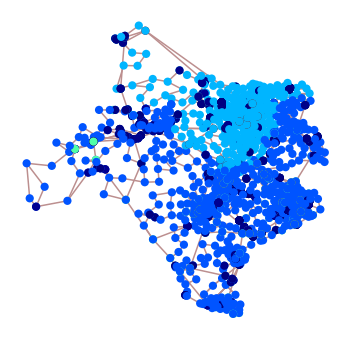

In [4]:
venom = network.buses.v_nom/500
venom.describe()


#p_out = network.generators.p_nom
#p_out.describe()
#bus_colors = pd.Series("r", network.buses.index)

#network.plot(bus_colors= venom)
#bus_colors[p_out<0] = "b"
#test = network.plot(bus_colors=venom, bus_cmap=plt.cm.jet)
fig, ax = plt.subplots(figsize=(12, 6))
data = network.plot(bus_colors=venom, bus_cmap=plt.cm.jet)
value = network.buses["v_nom"].to_numpy()

tooltip = mpld3.plugins.PointHTMLTooltip(data[0], value, 0, 0, -50)
fileName = "network" + str(3) + ".html" 
mpld3.plugins.connect(fig,tooltip)
mpld3.save_html(fig, fileName)


In [5]:
"fig, ax = plt.subplots(figsize = (12,6))\n",
    "data = network.plot(bus_colors=venom, bus_cmap=plt.cm.jet)\n",
    "#mpld3.fig_to_html(network)\n",
    "fig = plt.figure()\n",
    "#mpld3.plugins.PointHTMLTooltip(network)\n",
    "value = network.buses[\"v_nom\"].to_numpy()\n",
    "tooltip = mpld3.plugins.PointHTMLTooltip(data[0],  value, 0, 0, -50)\n",
    "#mpld3.plugins.connect(network, PointHTMLTooltip)\n",
    "#mpld3.display()\n"
    "#mpld3.display()\n",
    "mpld3.plugins.connect(fig,tooltip)\n",
    "number = 3\n",
    "fileName = \"network\" + str(number) + \".html\"\n",
    "mpld3.save_html(fig, fileName)"

IndentationError: unexpected indent (2955813325.py, line 2)